In [23]:
import networkx as nx
import numpy as np
import requests
import matplotlib.pyplot as plt
from collections import Counter
from io import BytesIO

url = "https://raw.githubusercontent.com/fridapfrandsen/network-data/main/rock_network.gexf"

response = requests.get(url)
response.raise_for_status()

G = nx.read_gexf(BytesIO(response.content))

# Part 1: Analyze the network

* Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.

We start by looking into 
- Network size (nodes and edges)
- Degree distributions (in/out for directed graphs)
- Power-law analysis
- Average shortest path length

In [24]:
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
density = 2 * n_edges / (n_nodes * (n_nodes - 1))

print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {n_edges}")
print(f"Average degree: {2 * n_edges / n_nodes:.2f}")
print(f"Density of graph: {density}")


Number of nodes: 484
Number of edges: 7283
Average degree: 30.10
Density of graph: 0.062308574166281674


In [25]:
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]




In [26]:
print("\nIn-Degree Statistics:")
print(f"  Average: {np.mean(in_degrees):.2f}")
print(f"  Median: {np.median(in_degrees):.2f}")
print(f"  Mode: {Counter(in_degrees).most_common(1)[0][0]}")
print(f"  Min: {np.min(in_degrees)}")
print(f"  Max: {np.max(in_degrees)}")
print(f"  Std Dev: {np.std(in_degrees):.2f}")

print("\nOut-Degree Statistics:")
print(f"  Average: {np.mean(out_degrees):.2f}")
print(f"  Median: {np.median(out_degrees):.2f}")
print(f"  Mode: {Counter(out_degrees).most_common(1)[0][0]}")
print(f"  Min: {np.min(out_degrees)}")
print(f"  Max: {np.max(out_degrees)}")
print(f"  Std Dev: {np.std(out_degrees):.2f}")


In-Degree Statistics:
  Average: 15.05
  Median: 10.00
  Mode: 3
  Min: 0
  Max: 119
  Std Dev: 16.98

Out-Degree Statistics:
  Average: 15.05
  Median: 13.00
  Mode: 12
  Min: 0
  Max: 73
  Std Dev: 10.54


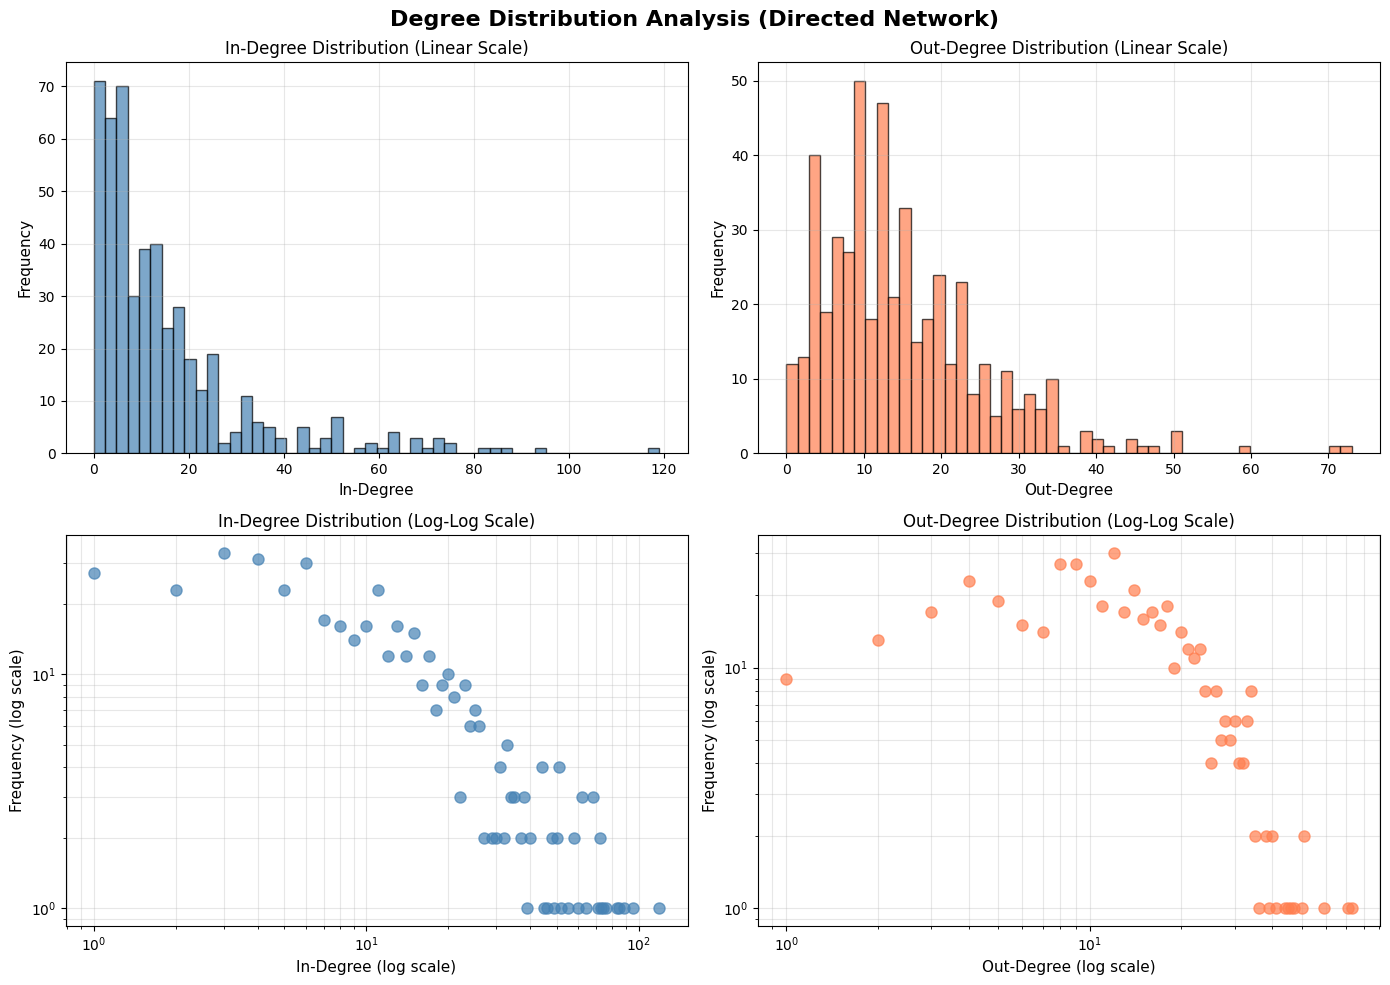

In [29]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Degree Distribution Analysis (Directed Network)', fontsize=16, fontweight='bold')

# In-degree distribution (linear scale)
axes[0, 0].hist(in_degrees, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('In-Degree', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('In-Degree Distribution (Linear Scale)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Out-degree distribution (linear scale)
axes[0, 1].hist(out_degrees, bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Out-Degree', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Out-Degree Distribution (Linear Scale)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# In-degree distribution (log-log scale)
in_degree_counts = Counter(in_degrees)
degrees_in = sorted(in_degree_counts.keys())
counts_in = [in_degree_counts[d] for d in degrees_in]
axes[1, 0].loglog(degrees_in, counts_in, 'o', alpha=0.7, color='steelblue', markersize=8)
axes[1, 0].set_xlabel('In-Degree (log scale)', fontsize=11)
axes[1, 0].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 0].set_title('In-Degree Distribution (Log-Log Scale)', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, which='both')

# Out-degree distribution (log-log scale)
out_degree_counts = Counter(out_degrees)
degrees_out = sorted(out_degree_counts.keys())
counts_out = [out_degree_counts[d] for d in degrees_out]
axes[1, 1].loglog(degrees_out, counts_out, 'o', alpha=0.7, color='coral', markersize=8)
axes[1, 1].set_xlabel('Out-Degree (log scale)', fontsize=11)
axes[1, 1].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 1].set_title('Out-Degree Distribution (Log-Log Scale)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
